# Predicting Heart Disease using machine learning

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition

> Binary classification prediction whether or not patient has heart disease based on their medical attributes.

## 2. Data
>UCI heart disease dataset -- https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

Minimize False Negative
> 95% Accuracy as a proof of concept. Evaluation metric is **Recall**

## 4. Features

Attribute Information:

Only 14 attributes used:
1. age -- age in years.
2. sex -- sex (1 = male; 0 = female)
3. cp -- chest pain type
    1. Value 0: typical angina
    2. Value 1: atypical angina
    3. Value 2: non-anginal pain
    4. Value 3: asymptomatic
4. trestbps --resting blood pressure (in mm Hg on admission to the hospital)
5. chol -- serum cholestoral in mg/dl
6. fbs -- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg -- resting electrocardiographic results
     1. Value 0: normal
     2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach -- maximum heart rate achieved
9. exang -- exercise induced angina (1 = yes; 0 = no)
10. oldpeak -- ST depression induced by exercise relative to rest
11. slope -- the slope of the peak exercise ST segment
     1. Value 0: upsloping
     2. Value 1: flat
     3. Value 2: downsloping
12. ca -- number of major vessels (0-3) colored by flourosopy
13. thal
    1. Value 3: normal
    2. Value 6: fixed defect
    3. Value 7: reversable defect
14. target - the predicted attribute (1 = has heart disease, 0 = is healthy)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_roc_curve

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape, df.dtypes

((303, 14),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1    165
0    138
Name: target, dtype: int64


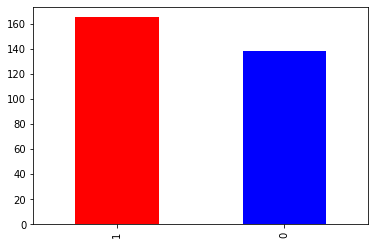

In [6]:
print(df.target.value_counts())
df.target.value_counts().plot(kind='bar', color=['red', 'blue']);

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Compare different features to target.
Find patterns within data, check how independent features are related to the target.

#### Sex vs Target

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Dataset is tilted towards males. Based on the dataset males are 50%/50%, ~75% of females has a heart disease.


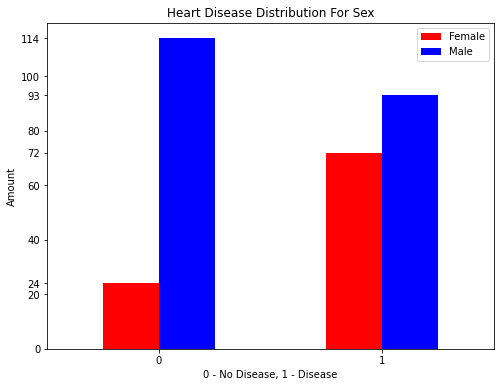

In [10]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(8, 6), color=['red', 'blue'])
plt.title('Heart Disease Distribution For Sex')
plt.xlabel('0 - No Disease, 1 - Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.yticks(np.append(np.linspace(0, 100, 6), (24, 72, 93, 114)))
plt.xticks(rotation=False);

#### Age vs Target

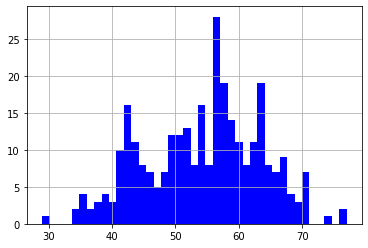

In [11]:
df.age.hist(color='blue', bins=len(pd.unique(df.age)));

In [12]:
pd.crosstab(df.target, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


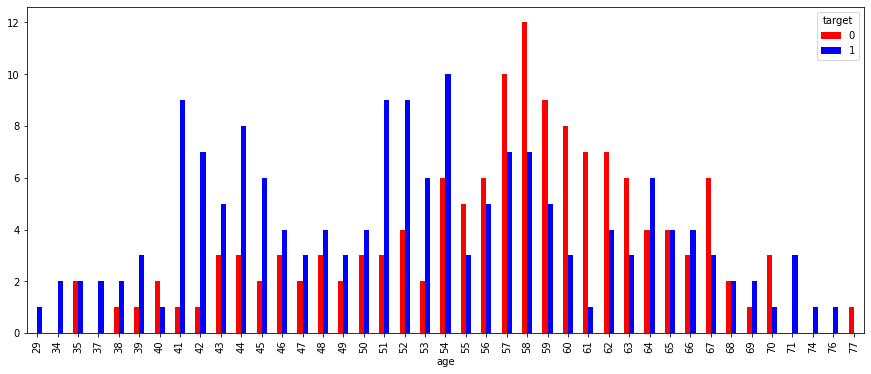

In [13]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(15, 6), color=['red', 'blue']);

#### Age vs Max Heart Rate (thalach) vs Target

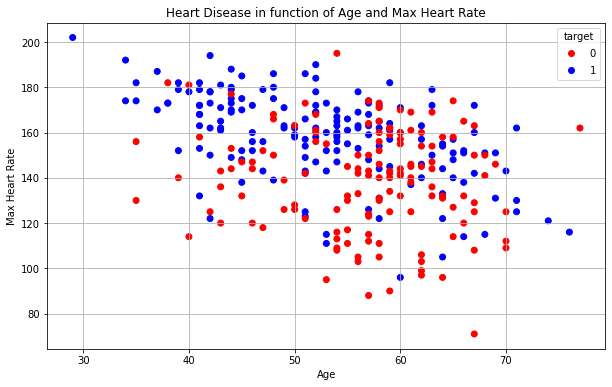

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df.age, df.thalach, c=df.target, cmap='bwr_r', label=df.target)
ax.set_title('Heart Disease in function of Age and Max Heart Rate')
ax.set_ylabel('Max Heart Rate')
ax.set_xlabel('Age')
ax.grid(True)
ax.legend(*scatter.legend_elements(), title='target');

#### Chest pain vs Target
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain (non-heart related)
    Value 3: asymptomatic

In [15]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Alot of patients that have a heart disease had a non-anginal pain.

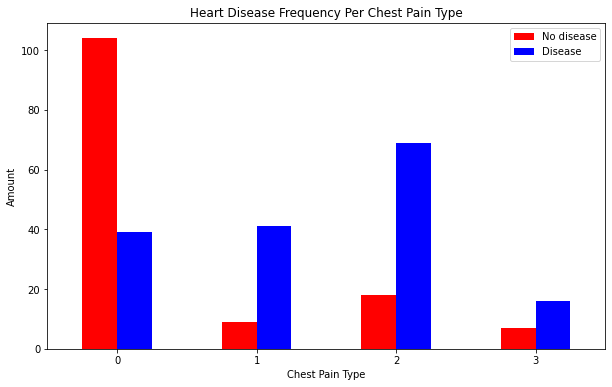

In [17]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=False);

#### Check correlation between independend variables
Make a correlation metrics

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


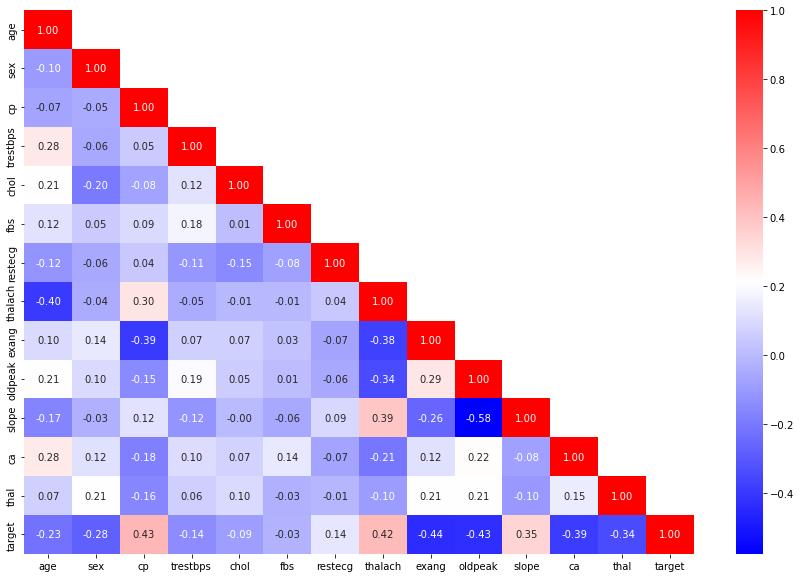

In [19]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix))
np.fill_diagonal(mask, False)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='bwr', annot=True, fmt=".2f", mask=mask);

## 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# put models in a dictionary
models = {
    'LinearSVC': LinearSVC(dual=False),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}


def fit_score(models, X_train, X_test, y_train, y_test):

    scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        y_pred = model.predict(X_test)
        
        scores[model_name] = score
        
        print(f'{model_name} score is: {score}')
        print(f'{model_name} Recall is: {recall_score(y_test, y_pred)}\n')
        
    return scores

In [25]:
scores = fit_score(models, X_train, X_test, y_train, y_test)

LinearSVC score is: 0.9180327868852459
LinearSVC Recall is: 1.0

Logistic Regression score is: 0.9016393442622951
Logistic Regression Recall is: 0.9615384615384616

K-Nearest Neighbors score is: 0.6557377049180327
K-Nearest Neighbors Recall is: 0.8461538461538461

Random Forest Classifier score is: 0.9344262295081968
Random Forest Classifier Recall is: 0.9615384615384616



(0.5, 0.95)

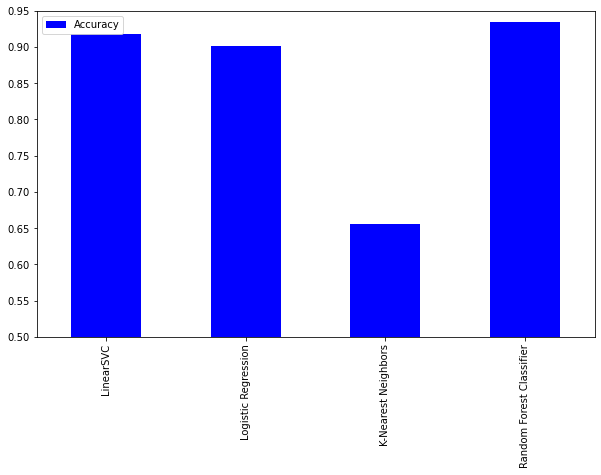

In [26]:
model_scores_df = pd.DataFrame(scores, index=['Accuracy'])
model_scores_df.T.plot(kind='bar', figsize=(10, 6), color='blue');
plt.ylim([0.5, 0.95])

### Tune Models

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Classification report
* Metrics

In [27]:
# tuning KNN by hand
neighbors = range(1, 21)

train_scores = []
test_scores = []

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

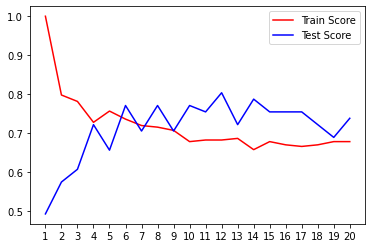

In [28]:
plt.plot(neighbors, train_scores, label='Train Score', color='red')
plt.plot(neighbors, test_scores, label='Test Score', color='blue')
plt.xticks(range(1,21,1))
plt.legend();

In [29]:
print(f'Max score of KNN {max(test_scores) * 100:.2f}% with n={test_scores.index(max(test_scores)) + 1}')

Max score of KNN 80.33% with n=12


#### Hyperparameter tuning with RandomizedSearchCV and GridSearchCV

* LinearSVC()
* LogisticRegression()
* RandomForestClassifier()

In [86]:
# scoring = {'Recall': 'recall', 'Accuracy': None}

linear_svc_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
}

logistic_regression_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

random_forest_param_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

svc = LinearSVC(dual=False)
gs = GridSearchCV(svc, param_grid=linear_svc_param_grid, verbose=2, cv=5, scoring=scoring, refit='Recall')

lr = LogisticRegression(max_iter=1000)
gs_lr = GridSearchCV(lr, param_grid=logistic_regression_param_grid, verbose=2, cv=5, scoring=scoring, refit='Recall')

rf = RandomForestClassifier()
rs_rf = RandomizedSearchCV(rf, param_distributions=random_forest_param_grid, cv=5, n_iter=25, verbose=2, 
                           scoring=scoring, refit='Recall')


In [87]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LinearSVC(dual=False),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, refit='Recall',
             scoring={'Accuracy': None, 'Recall': 'recall'}, verbose=2)

In [88]:
gs.best_params_, gs.best_score_, gs.cv_results_

({'C': 0.1},
 0.914021164021164,
 {'mean_fit_time': array([0.00239348, 0.00179005, 0.00159912, 0.00159965, 0.00180016]),
  'std_fit_time': array([0.00048335, 0.00039437, 0.00049041, 0.00048961, 0.0004012 ]),
  'mean_score_time': array([0.002812  , 0.00201278, 0.0021955 , 0.00220594, 0.0022049 ]),
  'std_score_time': array([3.94314536e-04, 1.14950397e-05, 3.89147988e-04, 3.97138962e-04,
         3.97685821e-04]),
  'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
  'split0_test_Recall': array([0.82142857, 0.75      , 0.75      , 0.75      , 0.75      ]),
  'split1_test_Recall': array([0.85714286, 0.85714286, 0.85714286, 0.85714286, 0.85714286]),
  'split2_test_Recall': array([0.96296296, 0.92592593, 0.85185185, 0.85185185, 0.85185185]),
  'split3_test_Recall': array([0.92857143, 0.92857143, 0.92857143,

In [89]:
# LinearSVC
gs.score(X_test, y_test)

1.0

In [90]:
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             refit='Recall', scoring={'Accuracy': None, 'Recall': 'recall'},
             verbose=2)

In [91]:
gs_lr.best_params_, gs_lr.best_score_, gs_lr.cv_results_

({'C': 0.08858667904100823, 'solver': 'liblinear'},
 0.914021164021164,
 {'mean_fit_time': array([0.00179749, 0.00099854, 0.0018014 , 0.00179749, 0.00200267,
         0.00119996, 0.00201268, 0.00119953, 0.0019949 , 0.00181036,
         0.00180955, 0.00160584, 0.00180168, 0.00199924, 0.0020061 ,
         0.00199857, 0.00219517, 0.00201197, 0.00160203, 0.00199513]),
  'std_fit_time': array([3.86002946e-04, 2.41451052e-06, 4.00269977e-04, 4.00693655e-04,
         4.24465429e-06, 4.01378878e-04, 1.50407169e-05, 4.01481155e-04,
         7.84596386e-06, 4.04973433e-04, 3.90926807e-04, 4.83425370e-04,
         4.00760807e-04, 5.99299139e-06, 9.36277987e-06, 1.32831462e-06,
         3.89921801e-04, 1.46958706e-05, 4.89674700e-04, 1.26630569e-05]),
  'mean_score_time': array([0.00279489, 0.00300078, 0.00219874, 0.00220237, 0.00199742,
         0.00219917, 0.00198727, 0.00220003, 0.00219412, 0.00218902,
         0.00219593, 0.00219412, 0.00219908, 0.00219984, 0.00238886,
         0.00240035, 0.0

In [92]:
# logistic regression
gs_lr.score(X_test, y_test)

1.0

In [93]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=460; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=460; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.6s
[CV] END max_depth=10

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=16, n_estimators=91

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   refit='Recall',
                   scoring={'Accuracy': None, 'Recall': 'recall'}, verbose=2)

In [94]:
rs_rf.best_params_, rs_rf.best_score_, rs_rf.cv_results_

({'n_estimators': 60,
  'min_samples_split': 14,
  'min_samples_leaf': 17,
  'max_depth': 3},
 0.9283068783068783,
 {'mean_fit_time': array([0.38439498, 0.57581954, 0.0904007 , 0.78580403, 0.29100146,
         0.65058928, 0.08939505, 0.05139518, 0.0485949 , 0.33679533,
         0.17198982, 0.44940948, 0.41678815, 0.37380152, 0.52881932,
         0.05121689, 0.09180026, 0.24780722, 0.73145609, 0.3470623 ,
         0.58439522, 0.44341211, 0.69619222, 0.51460285, 0.00959458]),
  'std_fit_time': array([0.0247809 , 0.01054334, 0.00080757, 0.00648612, 0.00409844,
         0.0104746 , 0.00102102, 0.00048314, 0.00049654, 0.00604049,
         0.00252046, 0.00402397, 0.00597563, 0.00564402, 0.00474909,
         0.00098805, 0.0032496 , 0.00440916, 0.0225484 , 0.01574974,
         0.03524505, 0.02127968, 0.0138712 , 0.0225734 , 0.0004965 ]),
  'mean_score_time': array([0.06100016, 0.09458833, 0.0171998 , 0.12839518, 0.04940677,
         0.11101379, 0.01720529, 0.0101994 , 0.01080561, 0.05640564,
 

In [95]:
# Radnom Forest
rs_rf.score(X_test, y_test)

1.0

In [96]:
scores

{'LinearSVC': 0.9180327868852459,
 'Logistic Regression': 0.9016393442622951,
 'K-Nearest Neighbors': 0.6557377049180327,
 'Random Forest Classifier': 0.9344262295081968}